In [19]:
from qutip import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [33]:
"""PARAMETERS"""
# h_bar = 1.0

N = 2                     # number of cavity fock states

# frequencies
wr = 5.0622 * 2 * pi      # already in GHz
wq = 4.7206 * 2 * pi
chi = 0.0052 * 2 * pi

# coupling
delta = abs(wr - wq)      # detuning
g = np.sqrt(delta * chi)  # coupling strength that is consistent with chi

n_th_a = 0.063            # avg number of thermal bath excitation

In [21]:
# compare detuning and g, the first should be much larger than the second
delta/(2*pi), g/(2*pi)

(0.34159999999999957, 0.042146411472389886)

In [22]:
# cavity operators
a = tensor(destroy(N), qeye(2))
nc = a.dag() * a
xc = a + a.dag()

# atomic operators
sm = tensor(qeye(N), destroy(2))
sz = tensor(qeye(N), sigmaz())
sx = tensor(qeye(N), sigmax())
nq = sm.dag() * sm
xq = sm + sm.dag()

I = tensor(qeye(N), qeye(2))

In [23]:
# dispersive hamiltonian
H = wr * (a.dag() * a + I/2.0) + (wq / 2.0) * sz + chi * (a.dag() * a + I/2) * sz

In [24]:
psi0 = tensor(coherent(N, np.sqrt(4)), (basis(2,0)+basis(2,1)).unit())

In [31]:
tlist = np.linspace(0, 250, 1000)

t1 = 800           # qubit relaxation rate

In [34]:
# collapse operators that describe dissipation

c_ops = []
    
# qubit relaxation
rate = 1/t1
c_ops.append(np.sqrt(rate * (1+n_th_a)) * sm)
c_ops.append(np.sqrt(rate * n_th_a) * sm.dag())

In [42]:
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])

Text(0.5, 1.0, 'Vacuum Rabi Oscillations')

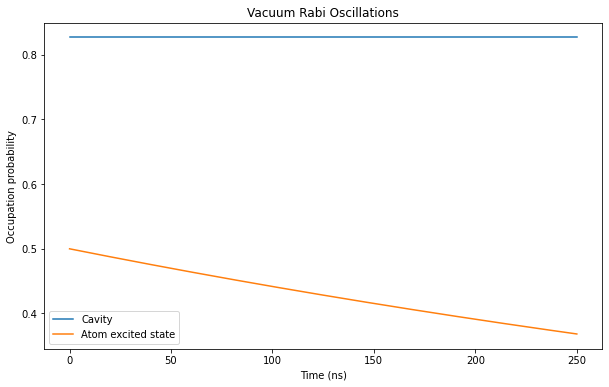

In [43]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1,1,figsize=(10,6))

axes.plot(tlist,n_c,label="Cavity")
axes.plot(tlist,n_a,label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel("Time (ns)")
axes.set_ylabel("Occupation probability")
axes.set_title("Vacuum Rabi Oscillations")

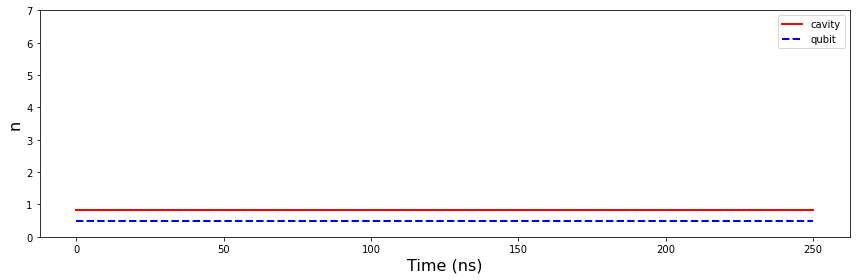

In [41]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,4))

ax.plot(tlist, nc_list, 'r', linewidth=2, label="cavity")
ax.plot(tlist, nq_list, 'b--', linewidth=2, label="qubit")
ax.set_ylim(0, 7)
ax.set_ylabel("n", fontsize=16)
ax.set_xlabel("Time (ns)", fontsize=16)
ax.legend()

fig.tight_layout()

In [101]:
# evolve system, request that the expectation values of a.dag()*a and sm*sm.dag() are returned by the solver 
# passing the list [a.dag()*a, sm.dag()*sm] as the fifth argument to the solver

output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])

Text(0.5, 1.0, 'Vacuum Rabi Oscillations')

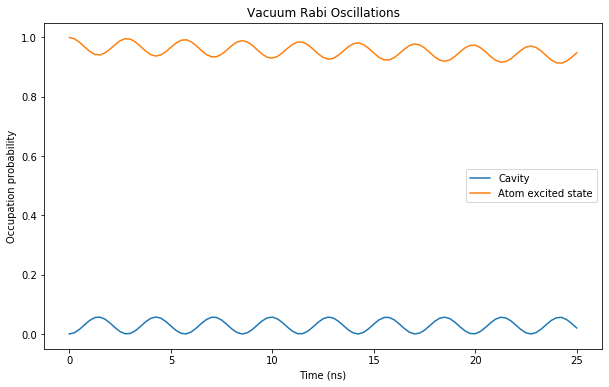

In [102]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1,1,figsize=(10,6))

axes.plot(tlist,n_c,label="Cavity")
axes.plot(tlist,n_a,label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel("Time (ns)")
axes.set_ylabel("Occupation probability")
axes.set_title("Vacuum Rabi Oscillations")